In [29]:
%%HTML
<style>
    body{
 --vscode-font-family: "LXGW WenKai";
    }
</style>

$$ f(t) = \left( \frac{t}{t_{\max}} \right)^n $$

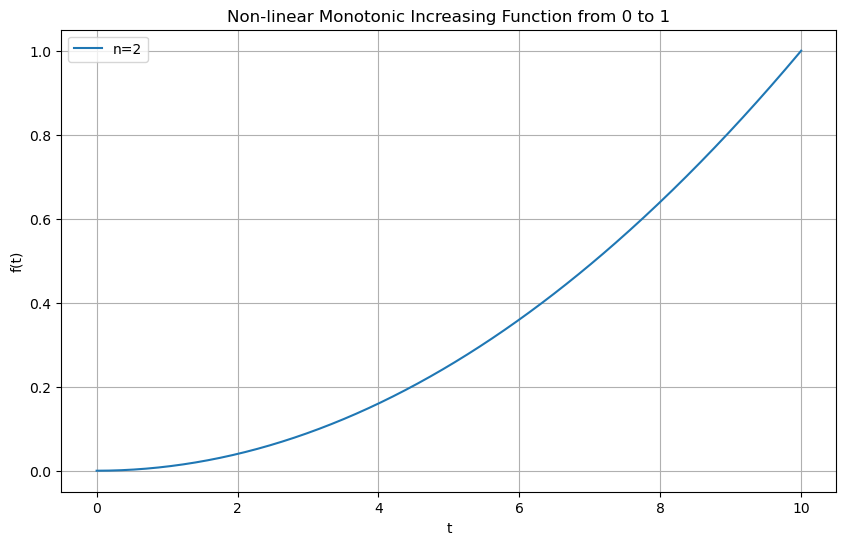

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
t_max = 10  # 最大时间
n = 2       # 指数n，控制递增速度

# 创建t值的数组，从0到t_max
t = np.linspace(0, t_max, 400)

# 计算f(t)
f_t = (t / t_max)**n

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(t, f_t, label=f'n={n}')
plt.title('Non-linear Monotonic Increasing Function from 0 to 1')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

$$ f(t) = \left( \frac{t}{T} \right)^n \cdot \left( 1 + \alpha\sin^\beta\left( \pi \left( \frac{t}{T} \right)^p \right) \right) $$
在这个改进的公式中：
- $t$ 是从 0 到 $T$ 的变量。
- $T$ 是函数达到 1 的时间点。
- $n$ 是控制增长速度的指数。
- $\alpha$ 是一个额外的参数，用于控制正弦波的振幅，它应该是一个非负数，以保证 $f(t)$ 始终在 0 到 1 之间。

这个函数仍然满足以下条件：
1. 当 $t = 0$ 时，$f(t) = 0$。
2. 当 $t = T$ 时，$f(t) = 1$。
3. $f(t)$ 在 $[0, T]$ 区间内单调递增。
4. $f(t)$ 的形状受到 $n$ 和 $\alpha$ 的影响，可以变得更加复杂和灵活。

你可以通过调整 $n$ 和 $\alpha$ 的值来改变函数的形状。例如：
- 当 $n$ 增大时，函数的增长速度变快。
- 当 $\alpha$ 增大时，正弦波的影响变得更明显，函数的增长路径会有一些波动。

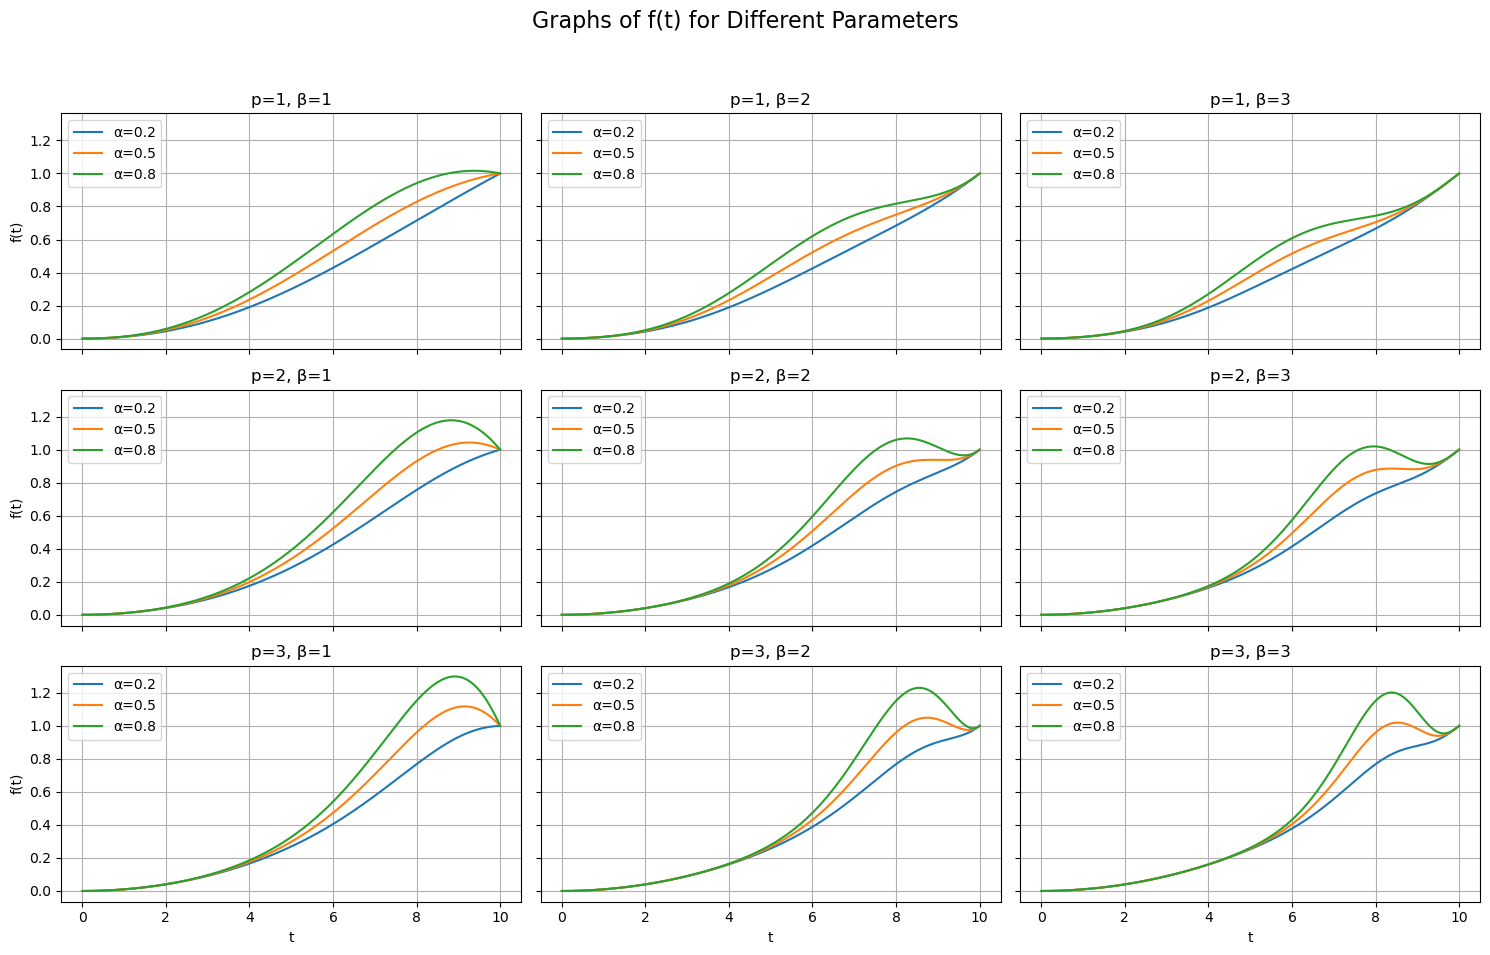

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
T = 10  # 假设T=10
n = 2   # 假设n=2

# 创建t值的数组，从0到T
t = np.linspace(0, T, 400)

# 参数列表
alpha_values = [0.2, 0.5, 0.8]
p_values = [1,2,3]
beta_values = [1, 2, 3]

# 定义计算函数
def f(t, n, p, alpha=0, beta=1):
    return (t / T)**n * (1 + alpha * np.sin(np.pi * (t / T)**p) ** beta)

# 计算子图数量
num_alpha = len(alpha_values)
num_p = len(p_values)
num_beta = len(beta_values)

# 创建3D子图网格
fig, axs = plt.subplots(num_p, num_beta, figsize=(15, 10), sharex=True, sharey=True)

# 如果只有一个子图，则将其转换为二维数组
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

for i, p in enumerate(p_values):
    for j, beta in enumerate(beta_values):
        for k, alpha in enumerate(alpha_values):
            f_t = f(t, n, p, alpha, beta)
            ax = axs[i, j]
            ax.plot(t, f_t, label=f'α={alpha}')
            if k == 0:
                ax.set_title(f'p={p}, β={beta}')
            if i == num_p - 1:  # 最后一行添加xlabel
                ax.set_xlabel('t')
            if j == 0:  # 第一列添加ylabel
                ax.set_ylabel('f(t)')
            ax.legend(loc='upper left')
            ax.grid(True)

fig.suptitle('Graphs of f(t) for Different Parameters', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

$$ f(t) = \left( \frac{t}{T} \right)^n \cdot \exp\left( -b \left( \frac{t}{T} \right)^m \right) $$
无法做到f(t)的值从0增加到1

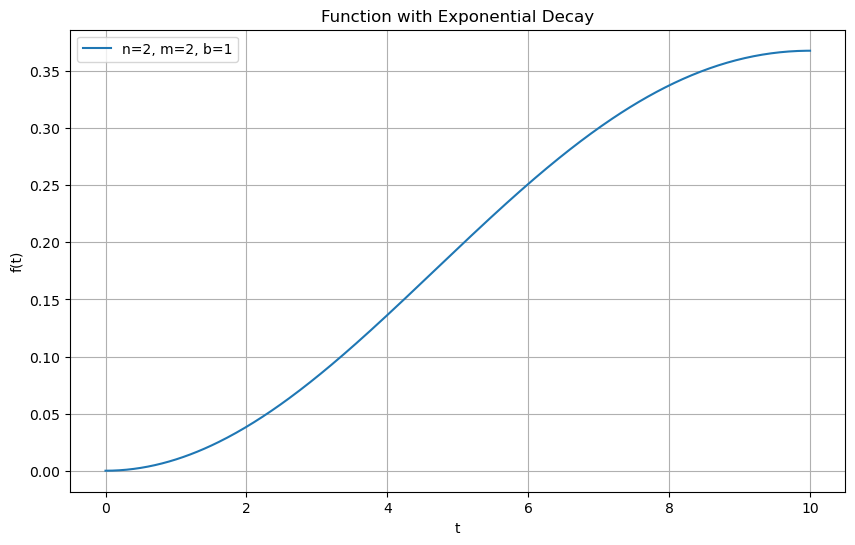

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
T = 10
n = 2
m = 2
b = 1

# 创建t值的数组，从0到T
t = np.linspace(0, T, 400)

# 计算f(t)
f_t = (t / T)**n * np.exp(-b * (t / T)**m)


# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(t, f_t, label=f'n={n}, m={m}, b={b}')
plt.title('Function with Exponential Decay')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

这两个公式都存在前期增长缓慢的问题  
$f(t) = \frac{1}{1 + \exp\left( -\beta \left( \frac{t}{T} - \gamma \right) \right)}$ :这个公式，f(t)的值最多到0.5   
$f(t) = \frac{1}{\exp\left( -\beta \left( \frac{t}{T} - \gamma \right) \right)}$ :这个公式，f(t)的值可以到1

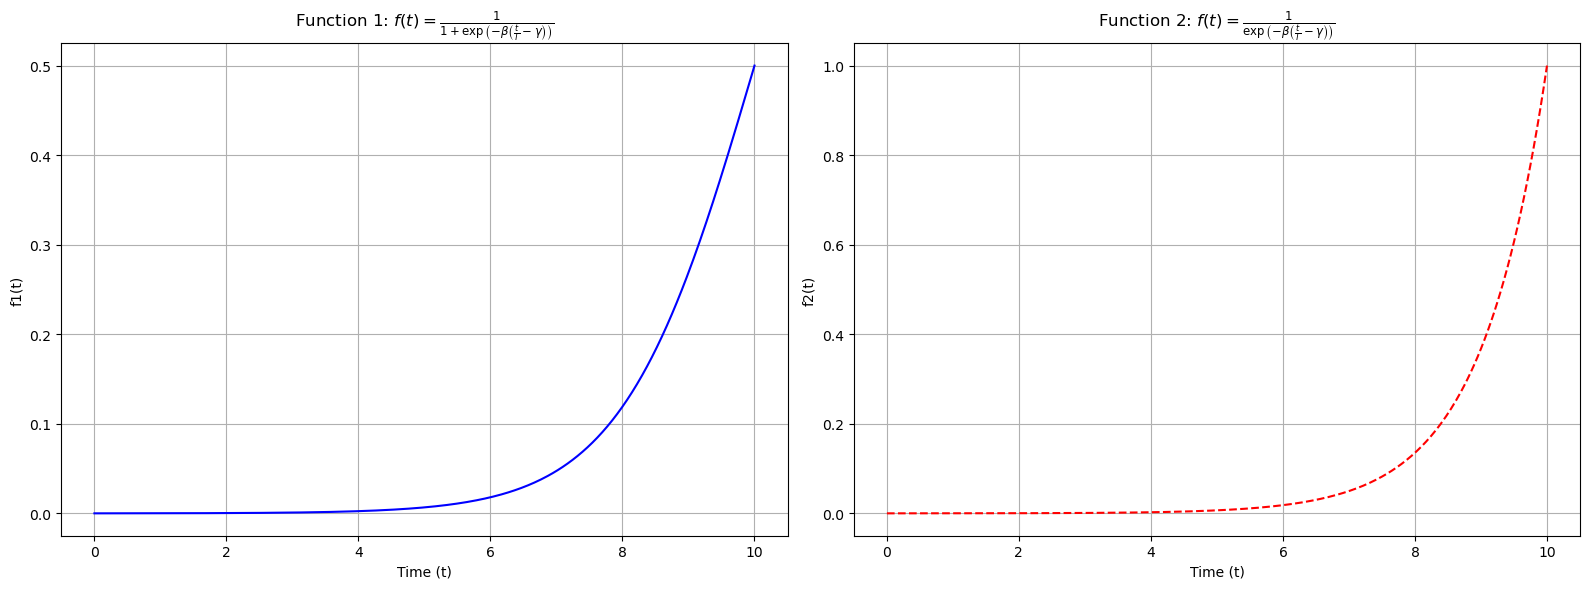

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数参数
#beta=1,gamma=0.5时，增长比较快，但是值不是从0开始，也未到1结束
beta = 10 # 调整 beta 控制函数的陡峭程度
T = 10.0
gamma = 1 #调整γ可以改变函数的中心点

# 创建时间轴
t = np.linspace(0, T, 400)

# 定义函数f1和f2
def f1(t, beta, T, gamma):
    return 1 / (1 + np.exp(-beta * ((t/T) - gamma)))

def f2(t, beta, T, gamma):
    return 1 / (np.exp(-beta * ((t/T) - gamma)))

# 计算函数值
y1 = f1(t, beta, T, gamma)
y2 = f2(t, beta, T, gamma)

# 创建一个包含两个横向排列子图的图表
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 绘制第一个函数
axs[0].plot(t, y1, color='blue')
axs[0].set_title(r'Function 1: $f(t) = \frac{1}{1 + \exp\left( -\beta \left( \frac{t}{T} - \gamma \right) \right)}$')
axs[0].set_xlabel('Time (t)')
axs[0].set_ylabel('f1(t)')
axs[0].grid(True)

# 绘制第二个函数
axs[1].plot(t, y2, color='red', linestyle='--')
axs[1].set_title(r'Function 2: $f(t) = \frac{1}{\exp\left( -\beta \left( \frac{t}{T} - \gamma \right) \right)}$')
axs[1].set_xlabel('Time (t)')
axs[1].set_ylabel('f2(t)')
axs[1].grid(True)

# 调整布局，防止重叠
plt.tight_layout()


# 显示图形
plt.show()

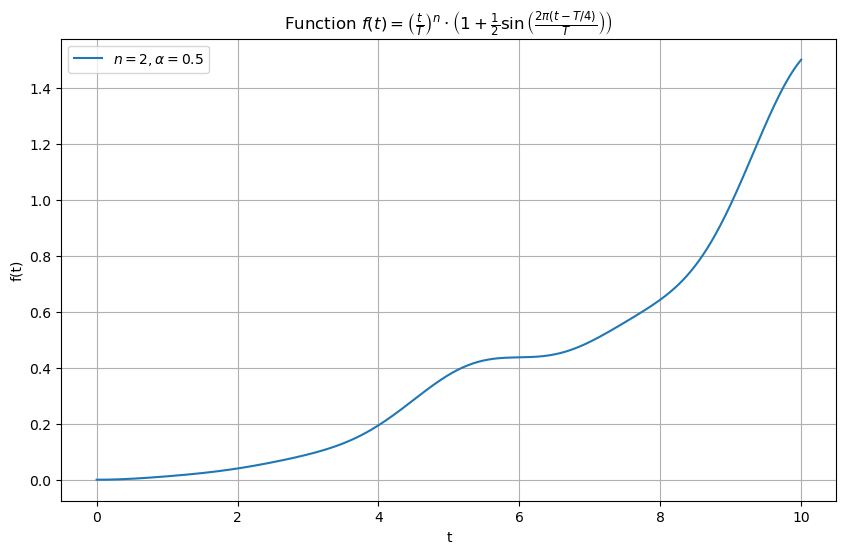

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
T = 10  # 假设 T = 10
n = 2    # 幂次
alpha = 0.5  # 控制正弦波的影响

# 定义函数
def f(t, T, n, alpha):
    return (t / T)**n * (1 + alpha * np.sin(2 * np.pi * (t - T / 4) / T) ** 4)

# 生成 t 的值
t_values = np.linspace(0, T, 400)

# 计算 f(t) 的值
f_values = f(t_values, T, n, alpha)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(t_values, f_values, label=f'$n = {n}, \\alpha = {alpha}$')
plt.title(r'Function $f(t) = \left( \frac{t}{T} \right)^n \cdot \left(1 + \frac{1}{2}\sin\left(\frac{2\pi(t-T/4)}{T}\right)\right)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

$$ f(t) = \left( \frac{t}{T} \right)^n \cdot \left(1 + \frac{1}{2}\left(\frac{t}{T} - \frac{1}{2}\right)^2\right) \cdot e^{-\frac{(t-T/2)^2}{2\sigma^2}} $$
在这个公式中：
- $\left( \frac{t}{T} \right)^n$ 是基础的单调递增函数。
- $\left(1 + \frac{1}{2}\left(\frac{t}{T} - \frac{1}{2}\right)^2\right)$ 是一个二次函数，它在 $t = T/2$ 时达到最大值，使得 $f(t)$ 在这个点附近稍微加速。
- $e^{-\frac{(t-T/2)^2}{2\sigma^2}}$ 是一个高斯函数，它使得 $f(t)$ 在 $t = T/2$ 附近的变化更加平滑。$\sigma$ 是高斯函数的标准差，可以控制平滑程度。

这个公式的特点：
- 在 $t = 0$ 时，所有项都为0，所以 $f(t) = 0$。
- 在 $t = T$ 时，$\left( \frac{t}{T} \right)^n = 1$，二次项为1，高斯项为 $e^0 = 1$，所以 $f(t) = 1$。
- 整个函数在 $t = 0$ 到 $t = T$ 的区间内单调递增。
- 通过调整 $n$ 和 $\sigma$，可以控制函数的斜率和平滑程度。

这个公式不仅满足了题目的基本要求，还通过引入二次项和高斯函数增加了复杂性，使得函数在 $t = T/2$ 附近的行为更加丰富。

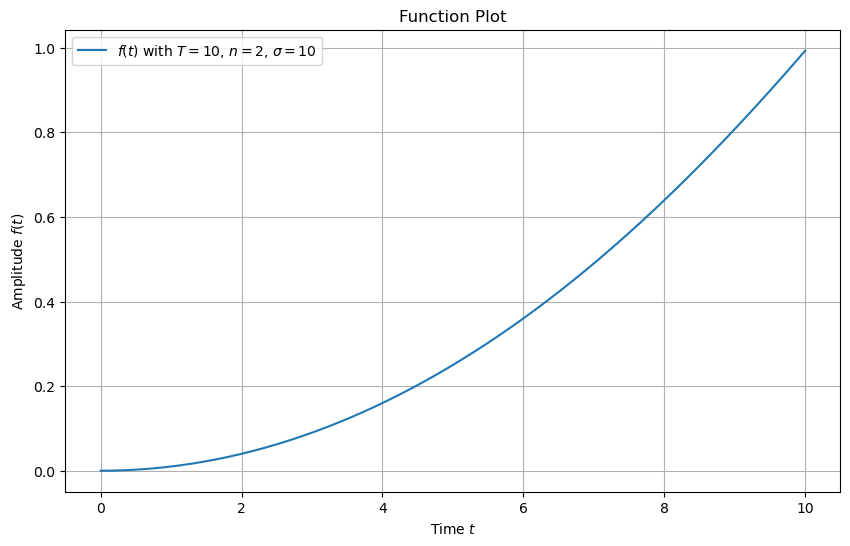

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数参数
T = 10  # 总时间
n = 2   # 幂次
sigma = 10  # 高斯分布的标准差，sigma表示对称线，让其与T的值一致，就可以得到一个单调递增的了

# 创建时间轴
t = np.linspace(0, T, 400)  # 从0到T，400个点

# 定义函数f(t)
def f(t, T, n, sigma):
    return (t / T)**n * (1 + 0.5 * ((t / T) - 0.5)**2) * np.exp(-(t - T/2)**2 / (2 * sigma**2))

# 计算函数值
y = f(t, T, n, sigma)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(t, y, label=f'$f(t)$ with $T={T}$, $n={n}$, $\\sigma = {sigma}$')
plt.title('Function Plot')
plt.xlabel('Time $t$')
plt.ylabel('Amplitude $f(t)$')
plt.legend()
plt.grid(True)
plt.show()

原公式
一个符合你描述的函数可以是二次函数的形式，其导数（即斜率）在区间内从大变小。以下是一个具体的例子：

### 函数
考虑函数 $f(x) = -\frac{1}{2}x^2 + bx + c$，其中 $b$ 和 $c$ 是常数。

### 导数
该函数的导数为 $f'(x) = -x + b$。

### 分析
1. **单调递增区间**：为了使函数在某个区间内单调递增，我们需要选择合适的 $b$ 值。导数 $f'(x) = -x + b$ 在 $x < b$ 时为正，因此函数在 $(-\infty, b)$ 上单调递增。

2. **导数值变化**：在区间 $(-\infty, b)$ 内，随着 $x$ 的增加，导数 $f'(x)$ 逐渐减小（从 $b$ 减小到 0）。这意味着函数值在前半段增加迅速（导数大），在后半段增加缓慢（导数小）。

### 具体例子
取 $b = T$ 和 $c = 0$，则函数为：
$$f(x) = -\frac{1}{2}x^2 + Tx$$

#### 导数
$$f'(x) = -x + T$$

#### 单调递增区间
函数在 $(-\infty, T)$ 上单调递增。

#### 导数值变化
- 当 $x$ 接近 $-\infty$ 时，$f'(x)$ 接近 T，函数值增加非常迅速。
- 当 $x$ 接近 T 时，$f'(x)$ 接近 0，函数值增加变得缓慢。


## 改进公式
#### 调整后的函数
$$f(t) = \frac{2}{T^2} \left( -\frac{1}{2}t^2 + Tt \right)$$

#### 解释
1. **缩放因子**：$\frac{2}{T^2}$ 用于确保函数的最大值为1。
2. **偏移量**：由于我们希望 $f(0) = 0$，所以不需要额外的偏移量。

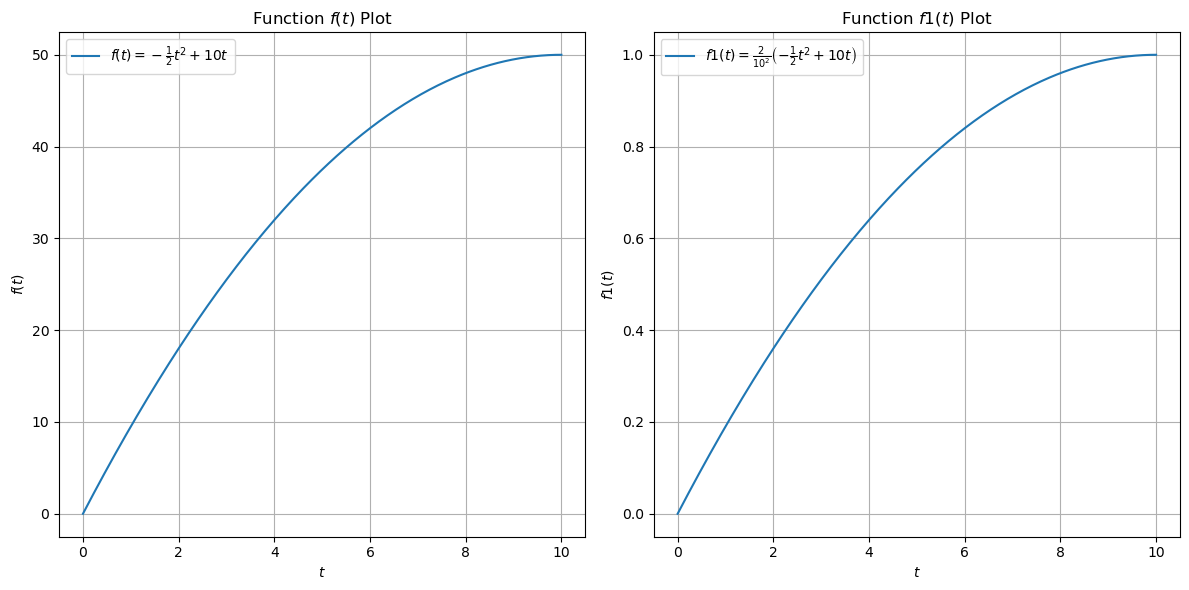

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 f(t)
def f(t, T):
    return -0.5 * t**2 + T * t

# 定义函数 f1(t)
def f1(t, T):
    return (2 / T**2) * (-0.5 * t**2 + T * t)

# 参数设置
T = 10  # T 的值

# 创建 t 值范围
t_values = np.linspace(0, T, 400)

# 计算对应的 f(t) 值
f_values = f(t_values, T)
f1_values = f1(t_values, T)

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 绘制 f(t) 的图像
axs[0].plot(t_values, f_values, label=f'$f(t) = -\\frac{{1}}{{2}}t^2 + {T}t$')
axs[0].set_title('Function $f(t)$ Plot')
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$f(t)$')
axs[0].legend()
axs[0].grid(True)

# 绘制 f1(t) 的图像
axs[1].plot(t_values, f1_values, label=f'$f1(t) = \\frac{{2}}{{{T}^2}} \\left(-\\frac{{1}}{{2}}t^2 + {T}t\\right)$')
axs[1].set_title('Function $f1(t)$ Plot')
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$f1(t)$')
axs[1].legend()
axs[1].grid(True)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

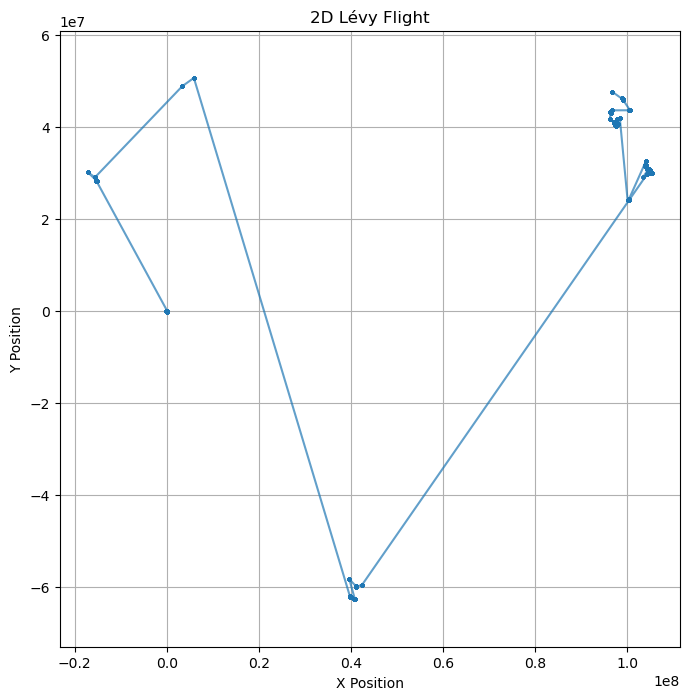

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy

def levy_flight_2d(n_steps, beta=1.5, start=(0, 0)):
    # 初始化位置
    x = [start[0]]
    y = [start[1]]

    for _ in range(n_steps):
        # 从莱维分布中抽样步长
        step_length = levy.rvs()
        # 从均匀分布中抽样方向角
        direction = 2 * np.pi * np.random.rand()

        # 更新位置
        x_new = x[-1] + step_length * np.cos(direction)
        y_new = y[-1] + step_length * np.sin(direction)

        # 添加新位置到路径
        x.append(x_new)
        y.append(y_new)

    return np.array(x), np.array(y)

# 参数设置
n_steps = 20000  # 步数
beta = 1.5     # 莱维指数（可以调整）

# 生成莱维飞行路径
x, y = levy_flight_2d(n_steps, beta)

# 绘制结果
plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='o', markersize=2, linestyle='-', alpha=0.7)
plt.title('2D Lévy Flight')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')  # 确保x轴和y轴比例相同
plt.show()

C:\Users\10907\AppData\Local\Temp\ipykernel_24020\2515223038.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt[i+1, 0] = pt[i, 0] + s1
C:\Users\10907\AppData\Local\Temp\ipykernel_24020\2515223038.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt[i+1, 1] = pt[i, 1] + s2


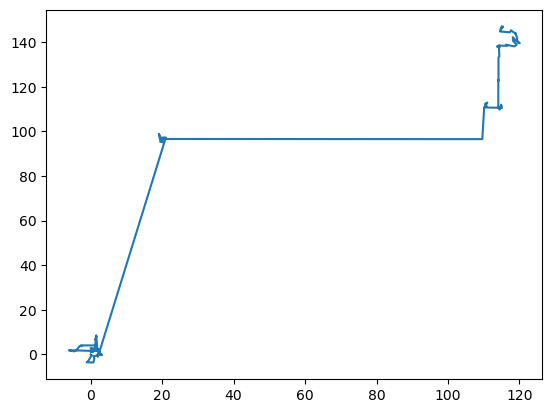

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
#------------------------------------------------------------------------------

size = 100
pt = np.zeros([size, 2])
#------------------------------------------------------------------------------

beta = 1.5
sigma_v = 1
sigma_u = ( ( math.gamma(1+beta)*np.sin(np.pi*beta/2) ) / ( beta*math.gamma((1+beta)/2)*2**((beta-1)/2) ) )**(1/beta)

for i in range(size-1):
    u = np.random.normal(0, sigma_u**2, size=1)
    v = np.random.normal(0, sigma_v**2, size=1)
    s1 = u/(np.abs(v)**(1/beta))
    
    u = np.random.normal(0, sigma_u, size=1)
    v = np.random.normal(0, sigma_v, size=1)
    s2 = u/(np.abs(v)**(1/beta))

    pt[i+1, 0] = pt[i, 0] + s1
    pt[i+1, 1] = pt[i, 1] + s2
#------------------------------------------------------------------------------

plt.figure(0)
plt.plot(pt[:, 0], pt[:, 1])
plt.show()